In [1]:
import numpy as np
import pandas as pd
import json
import math
import matplotlib.pyplot as plt
import matplotlib as mpl
import time
import datetime as dt
from string import Template
import matplotlib.dates as mdates
import matplotlib as mpl
from pandas_profiling import ProfileReport

In [2]:
d = pd.date_range(start='1/1/2020', end='12/31/2020')

x = pd.DataFrame(d)
x.columns = ['date']
#x
y =x['date'].dt.strftime('%m-%d-%Y')
z = pd.DataFrame(y)
#z

In [3]:
value_for_filter = input('Enter what day (mm-dd-yyyy format) would you like to look data at:\n')

Enter what day (mm-dd-yyyy format) would you like to look data at:
08-08-2020


In [4]:
df = z[z["date"].isin([value_for_filter])]
dates=((df["date"]).to_string(index=False))
input_date = dates.strip(' "\'\t\r\n')
print(input_date)

08-08-2020


In [5]:
url_new = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/'+ f'{input_date}' +'.csv' 
print(url_new)

https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/08-08-2020.csv


In [6]:
diff_df = pd.DataFrame({'days' : [9]*366})
len(diff_df)
less_diff_df = pd.DataFrame({'justone' : [1]*366})
#x

In [7]:
x['days'] = diff_df['days'].values
x['days'] = diff_df['days'].to_numpy()
#print(x)

x['diff'] = x['date'] -  pd.to_timedelta(x['days'], unit='d')
diff_date = x['diff']
#x

In [8]:
index_no = (x[x['date']==input_date].index.values)
index_int = index_no[0]
index_int
selected_diff = diff_date[index_int]
selected_diff

Timestamp('2020-07-30 00:00:00')

In [9]:
diff_format = pd.to_datetime(selected_diff)
diff_format
diff_final = diff_format.strftime('%m-%d-%Y')
print(diff_final)

07-30-2020


In [10]:
url_Nine_day_old = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/'+ f'{diff_final}' +'.csv' 
print(url_Nine_day_old)

https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/07-30-2020.csv


In [11]:
#combo = pd.concat(z, diff_df, ignore_index=True)

x['justone'] = less_diff_df['justone'].values
x['justone'] = less_diff_df['justone'].to_numpy()
x

x['less_diff_df'] = x['date'] -  pd.to_timedelta(x['justone'], unit='d')
less_diff_date = x['less_diff_df']
#less_diff_date

In [12]:
index_no_2 = (x[x['date']==input_date].index.values)
index_int_2 = index_no_2[0]
index_int_2
selected_diff_older = less_diff_date[index_int_2]
selected_diff_older

Timestamp('2020-08-07 00:00:00')

In [13]:
diff_format_2 = pd.to_datetime(selected_diff_older)
diff_format_2
diff_final_2 = diff_format_2.strftime('%m-%d-%Y')
print(diff_final_2)

08-07-2020


In [14]:
url_One_day_old = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/'+ f'{diff_final_2}' +'.csv' 
print(url_One_day_old)

https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/08-07-2020.csv


In [15]:
#data_new = ('08-13-2020.csv')
#data_old = ('08-06-2020.csv')

In [16]:
new_df = pd.read_csv(url_new)
Nine_day_old_df = pd.read_csv(url_Nine_day_old)
One_day_old_df = pd.read_csv(url_One_day_old)


new_df.head()
Nine_day_old_df.head()
One_day_old_df.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
0,45001.0,Abbeville,South Carolina,US,2020-08-08 04:34:53,34.223334,-82.461707,321,8,0,313.0,"Abbeville, South Carolina, US",1308.761773,2.492212
1,22001.0,Acadia,Louisiana,US,2020-08-08 04:34:53,30.295065,-92.414197,2570,79,0,2491.0,"Acadia, Louisiana, US",4142.154888,3.073930
2,51001.0,Accomack,Virginia,US,2020-08-08 04:34:53,37.767072,-75.632346,1087,16,0,1071.0,"Accomack, Virginia, US",3363.658869,1.471941
3,16001.0,Ada,Idaho,US,2020-08-08 04:34:53,43.452658,-116.241552,8720,76,0,8644.0,"Ada, Idaho, US",1810.680106,0.871560
4,19001.0,Adair,Iowa,US,2020-08-08 04:34:53,41.330756,-94.471059,28,0,0,28.0,"Adair, Iowa, US",391.498881,0.000000


In [17]:
new_clean_df = new_df.drop(columns=['Province_State', 'Lat', 'Long_', 'Admin2', 'FIPS', 'Combined_Key'])
Nine_day_old_clean_df = Nine_day_old_df.drop(columns=['Province_State', 'Lat', 'Long_', 'Admin2', 'FIPS', 'Combined_Key'])
One_day_old_clean_df = One_day_old_df.drop(columns=['Province_State', 'Lat', 'Long_', 'Admin2', 'FIPS', 'Combined_Key'])

new_clean_df.head()

,Country_Region,Last_Update,Confirmed,Deaths,Recovered,Active,Incidence_Rate,Case-Fatality_Ratio
0,US,2020-08-09 04:34:54,325,8,0,317.0,1325.070331,2.461538
1,US,2020-08-09 04:34:54,2570,79,0,2491.0,4142.154888,3.073930
2,US,2020-08-09 04:34:54,1095,16,0,1079.0,3388.414408,1.461187
3,US,2020-08-09 04:34:54,8932,81,0,8851.0,1854.701227,0.906852
4,US,2020-08-09 04:34:54,29,0,0,29.0,405.480984,0.000000


In [18]:
Nine_day_old_clean_df.head()

,Country_Region,Last_Update,Confirmed,Deaths,Recovered,Active,Incidence_Rate,Case-Fatality_Ratio
0,US,2020-07-31 04:35:18,285,7,0,278.0,1161.984751,2.456140
1,US,2020-07-31 04:35:18,2299,71,0,2228.0,3705.375131,3.088299
2,US,2020-07-31 04:35:18,1074,15,0,1059.0,3323.431118,1.396648
3,US,2020-07-31 04:35:18,7681,55,0,7626.0,1594.935079,0.716053
4,US,2020-07-31 04:35:18,20,0,0,20.0,279.642058,0.000000


In [19]:
One_day_old_clean_df

,Country_Region,Last_Update,Confirmed,Deaths,Recovered,Active,Incidence_Rate,Case-Fatality_Ratio
0,US,2020-08-08 04:34:53,321,8,0,313.0,1308.761773,2.492212
1,US,2020-08-08 04:34:53,2570,79,0,2491.0,4142.154888,3.073930
2,US,2020-08-08 04:34:53,1087,16,0,1071.0,3363.658869,1.471941
3,US,2020-08-08 04:34:53,8720,76,0,8644.0,1810.680106,0.871560
4,US,2020-08-08 04:34:53,28,0,0,28.0,391.498881,0.000000
...,...,...,...,...,...,...,...,...
3935,US,2020-08-04 12:34:49,2,0,0,2.0,NaN,0.000000
3936,Colombia,2020-07-17 22:34:48,0,0,0,0.0,NaN,NaN
3937,Canada,2020-07-13 12:34:33,13,0,13,0.0,NaN,0.000000
3938,US,2020-07-10 02:34:22,1,0,0,1.0,26.055237,0.000000


In [20]:
print('What it implies is that on a given day, of the cases which were first reported 9 days previously 7% of those cases would have either recovered or passed away. After 16 days therefore 49% of cases would have recovered or passed away and after 23 days 98% of cases would have recovered or passsed away.This formula is only being used to predict the number of recoveries from the time that JHU data is not available. We can compare the results of this formula to the existing data from JHU to show the level of fit. This can be seen in the following 2 graphs')

What it implies is that on a given day, of the cases which were first reported 9 days previously 7% of those cases would have either recovered or passed away. After 16 days therefore 49% of cases would have recovered or passed away and after 23 days 98% of cases would have recovered or passsed away.This formula is only being used to predict the number of recoveries from the time that JHU data is not available. We can compare the results of this formula to the existing data from JHU to show the level of fit. This can be seen in the following 2 graphs


In [21]:
#hide_input
totalConfirmed_new = new_clean_df['Confirmed'].sum(axis=0)
totalDeaths_new = new_clean_df['Deaths'].sum(axis=0)
totalRecovered_new = pd.to_numeric(new_clean_df['Recovered'].sum(axis=0), downcast='integer')
frame_new = {'Confirmed': totalConfirmed_new, 'Deaths': totalDeaths_new, 'Est. Recoveries': totalRecovered_new, 'Outstanding':totalConfirmed_new-totalDeaths_new-totalRecovered_new}
result_new = pd.DataFrame(frame_new,index=[0])
#result = result.set_index(pd.to_datetime(result.index)).sort_index()
result_new

#profile = ProfileReport(result_new, title="Pandas Profiling Report_today", explorative=True)
#profile.to_file("latest_data.html")

,Confirmed,Deaths,Est. Recoveries,Outstanding
0,19637506,726781,11939109,6971616


In [22]:
#hide_input
Nine_days_totalConfirmed = Nine_day_old_clean_df['Confirmed'].sum(axis=0)
Nine_days_totalDeaths = Nine_day_old_clean_df['Deaths'].sum(axis=0)
Nine_days_totalRecovered = pd.to_numeric(Nine_day_old_clean_df['Recovered'].sum(axis=0), downcast='integer')
Nine_days_frame = {'Confirmed': Nine_days_totalConfirmed, 'Deaths': Nine_days_totalDeaths, 'Est. Recoveries': Nine_days_totalRecovered, 'Outstanding':Nine_days_totalConfirmed-Nine_days_totalDeaths-Nine_days_totalRecovered}
Nine_days_result = pd.DataFrame(Nine_days_frame,index=[0])
#result = result.set_index(pd.to_datetime(result.index)).sort_index()
Nine_days_result

,Confirmed,Deaths,Est. Recoveries,Outstanding
0,17309805,673194,10170650,6465961


In [23]:
#hide_input
One_day_totalConfirmed = One_day_old_clean_df['Confirmed'].sum(axis=0)
One_day_totalDeaths = One_day_old_clean_df['Deaths'].sum(axis=0)
One_day_totalRecovered = pd.to_numeric(One_day_old_clean_df['Recovered'].sum(axis=0), downcast='integer')
One_day_frame = {'Confirmed': One_day_totalConfirmed, 'Deaths': One_day_totalDeaths, 'Est. Recoveries': One_day_totalRecovered, 'Outstanding':One_day_totalConfirmed-One_day_totalDeaths-One_day_totalRecovered}
One_day_result = pd.DataFrame(One_day_frame,index=[0])
#result = result.set_index(pd.to_datetime(result.index)).sort_index()
One_day_result

,Confirmed,Deaths,Est. Recoveries,Outstanding
0,19378036,721324,11737927,6918785


In [24]:
print('Rn=Rn−1+(Cn−9−Rn−1)∗0.07')

Rn=Rn−1+(Cn−9−Rn−1)∗0.07


In [25]:
#calculate 
Rn = One_day_totalRecovered + (Nine_days_totalConfirmed - One_day_totalRecovered)*0.07
Rn_absolute=Rn.round(0)
print(Rn_absolute)
frameG = {"Predicted_Recoveries":Rn_absolute,'Recoveries': totalRecovered_new}
resultG = pd.DataFrame(frameG, index =[0])
#resultG = resultG.set_index(pd.to_datetime(resultG.index)).sort_index()
resultG
Difference = ((Rn_absolute - totalRecovered_new)/totalRecovered_new)*100
print(Difference)
#profile = ProfileReport(resultG, title="Pandas Profiling Report", explorative=True)
#profile.to_file("1_your_report.html")

12127958.0
1.5817679527006578


In [26]:
def get_frame(name):
    url = ('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/'
        f'csse_covid_19_time_series/time_series_19-covid-{name}.csv')
    df = pd.read_csv(url)
    return df

def get_frameNew(name):
    url = ('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/'
        f'csse_covid_19_time_series/time_series_covid19_{name}_global.csv')
    df = pd.read_csv(url)
    return df

def get_frameArchived(name):
    url = (f'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/archived_data/archived_time_series/time_series_19-covid-{name}_archived_0325.csv')
    df = pd.read_csv(url)
    return df

def flatten(df):
    array = []
    d = df.to_dict()
    for v in d.items():
        day = v[0]
        for c in v[1].items():
            country = c[0]
            value = c[1]
            array.append({"key":country,"value":value,"date":day})
    return array

def combine(cx,dx,rx):
    all = []
    for i, v in enumerate(cx):
        v['confirmed'] = v['value']
        v['deaths'] = dx[i]['value']
        v['recovered'] = rx[i]['value']
        if cx[i]['key'] != rx[i]['key']:
            print("error: country mismatch")
        if cx[i]['date'] != rx[i]['date']:
            print("error: date mismatch")
        v['value'] = v['value'] - dx[i]['value'] - rx[i]['value']
        if v['value'] < 0:
            print("error:", cx[i]['date'], cx[i]['key'], v['value'], v['confirmed'], dx[i]['value'], rx[i]['value'])
            v['value'] = 0
        #calculate CFR
        fr = 0
        if rx[i]['value'] + dx[i]['value'] + v['value'] > 0:
            fr = dx[i]['value'] / (rx[i]['value'] + dx[i]['value'] + v['value'])
        v['fatality'] = fr
        all.append(v)
    return all;

def makeJSVar(array,varname):
    json_string = json.dumps(array)
    pre = "var " + varname + " ="
    post = ";" #"; get" + varname + " = function (){ return " + varname + "};})();"
    jsVar = pre + json_string + post
    return jsVar

In [27]:
alternateNames = [
    [["East Timor"],"Timor-Leste"]
    ,[["Taiwan*"],"Taiwan"]
    ,[["Korea, South"],"South Korea"]
    ,[["The Bahamas","Bahamas, The"],"Bahamas"]
    ,[["The Gambia","Gambia, The"],"Gambia"]
    ,[["Cape Verde"],"Cabo Verde"]
    ,[["French Guiana","Guadeloupe","Martinique","Mayotte","Reunion"],"France"]
    ,[["Guam","Puerto Rico"],"US"]
    ,[["Greenland"],"Denmark"]
    ,[["Cruise Ship","Diamond Princess"],"International Conveyance"]
    ,[["Guernsey","Jersey"],"United Kingdom"]
    ,[["Republic of the Congo"],"Congo (Brazzaville)"]
]

def replaceCountries(y):
    for countries in alternateNames:
        if y in countries[0]:
            return countries[1]
    return y
    
def extractGlobal(df):
    df = df.drop(columns=['Province/State', 'Lat', 'Long'])
    df['Country/Region'] = df['Country/Region'].apply(lambda x: replaceCountries(x))
    df = df.groupby('Country/Region').sum()
    return df

abbreviations=[{"name":"Alabama","abbreviation":"AL"},{"name":"Alaska","abbreviation":"AK"},{"name":"American Samoa","abbreviation":"AS"},{"name":"Arizona","abbreviation":"AZ"},{"name":"Arkansas","abbreviation":"AR"},{"name":"California","abbreviation":"CA"},{"name":"Colorado","abbreviation":"CO"},{"name":"Connecticut","abbreviation":"CT"},{"name":"Delaware","abbreviation":"DE"},{"name":"District of Columbia","abbreviation":"D.C."},{"name":"Federated States Of Micronesia","abbreviation":"FM"},{"name":"Florida","abbreviation":"FL"},{"name":"Georgia","abbreviation":"GA"},{"name":"Guam","abbreviation":"GU"},{"name":"Hawaii","abbreviation":"HI"},{"name":"Idaho","abbreviation":"ID"},{"name":"Illinois","abbreviation":"IL"},{"name":"Indiana","abbreviation":"IN"},{"name":"Iowa","abbreviation":"IA"},{"name":"Kansas","abbreviation":"KS"},{"name":"Kentucky","abbreviation":"KY"},{"name":"Louisiana","abbreviation":"LA"},{"name":"Maine","abbreviation":"ME"},{"name":"Marshall Islands","abbreviation":"MH"},{"name":"Maryland","abbreviation":"MD"},{"name":"Massachusetts","abbreviation":"MA"},{"name":"Michigan","abbreviation":"MI"},{"name":"Minnesota","abbreviation":"MN"},{"name":"Mississippi","abbreviation":"MS"},{"name":"Missouri","abbreviation":"MO"},{"name":"Montana","abbreviation":"MT"},{"name":"Nebraska","abbreviation":"NE"},{"name":"Nevada","abbreviation":"NV"},{"name":"New Hampshire","abbreviation":"NH"},{"name":"New Jersey","abbreviation":"NJ"},{"name":"New Mexico","abbreviation":"NM"},{"name":"New York","abbreviation":"NY"},{"name":"North Carolina","abbreviation":"NC"},{"name":"North Dakota","abbreviation":"ND"},{"name":"Northern Mariana Islands","abbreviation":"MP"},{"name":"Ohio","abbreviation":"OH"},{"name":"Oklahoma","abbreviation":"OK"},{"name":"Oregon","abbreviation":"OR"},{"name":"Palau","abbreviation":"PW"},{"name":"Pennsylvania","abbreviation":"PA"},{"name":"Puerto Rico","abbreviation":"PR"},{"name":"Rhode Island","abbreviation":"RI"},{"name":"South Carolina","abbreviation":"SC"},{"name":"South Dakota","abbreviation":"SD"},{"name":"Tennessee","abbreviation":"TN"},{"name":"Texas","abbreviation":"TX"},{"name":"Utah","abbreviation":"UT"},{"name":"Vermont","abbreviation":"VT"},{"name":"Virgin Islands","abbreviation":"VI"},{"name":"Virginia","abbreviation":"VA"},{"name":"Washington","abbreviation":"WA"},{"name":"West Virginia","abbreviation":"WV"},{"name":"Wisconsin","abbreviation":"WI"},{"name":"Wyoming","abbreviation":"WY"}]

def replaceStates(y):
    print(y)
    x = y.split(",")
    if len(x) > 1:
        for i, e in enumerate(abbreviations):
            if e['abbreviation'].strip() == x[1].strip():
                return e['name']
    if y == "United States Virgin Islands":
        return "Virgin Islands"
    return y

def extractUSA(df):
    df = df[df['Country/Region'] == "US"]
    df = df.drop(columns=['Country/Region', 'Lat', 'Long'])
    df = df[~df['Province/State'].isin(["US"])]
    df['Province/State'] = df['Province/State'].apply(lambda x: replaceStates(x))
    df = df.groupby('Province/State').sum()
    dates = df.columns[:32].values
    df = df.drop(columns=dates)
    return df

def extractCanada(df):
    df = df[df['Country/Region'] == "Canada"]
    df = df.drop(columns=['Country/Region', 'Lat', 'Long'])
    df = df.groupby('Province/State').sum()
    dates = df.columns[:32].values
    df = df.drop(columns=dates)
    return df

eu = ['Germany','Finland','Italy','Spain','Belgium','Switzerland','Austria','Greece','Norway','Romania','Estonia','San Marino','Belarus','Iceland','Lithuania','Ireland','Luxembourg','Monaco','Portugal','Andorra','Latvia','Ukraine' 'Hungary','Liechtenstein','Poland','Bosnia and Herzegovina','Slovenia','Serbia','Slovakia','Bulgaria','Albania','Holy See','France','Denmark','Czechia','Moldova','United Kingdom','Kosovo','Netherlands','Montenegro']

def extractEurope(df):
    df = df[df['Country/Region'].isin(eu)]
    df = df.drop(columns=['Province/State', 'Lat', 'Long'])
    df = df.groupby('Country/Region').sum()
    datesEU = df.columns[:32].values
    df = df.drop(columns=datesEU)
    return df



In [28]:
confirmedRaw = get_frameNew('confirmed')
deathsRaw = get_frameNew('deaths')
recoveredRaw = get_frameArchived('Recovered')

In [29]:
def predictRecovered(data):
    c = data["confirmed"]
    d = data['deaths']
    r = data['recovered']
    rp = data['recovered_predicted']
    
    ###Add columns
    for col in c.columns:
        if col not in rp.columns:
            rp[col] = float('nan')
            
    #Replace column values
    for i, row in rp.iterrows():
        for j, v in enumerate(row.values):
            if math.isnan(v):
                date = pd.to_datetime(rp.columns[j])
                try:
                    dateMinus14 = date - pd.to_timedelta('9 days')
                    colMinus14 = dateMinus14.strftime('%m-%d-%Y')
                    lastr = rp.loc[i,rp.columns[j-1]]
                    rp.loc[i,rp.columns[j]] = round(lastr + (c.loc[i,colMinus14]-lastr)*0.07)
                except KeyError:
                    pass
            
    return {"confirmed":c,"deaths":d,"recovered_predicted":rp,"recovered":r}

def collect(extract):
    c = extract(confirmedRaw)
    r = extract(recoveredRaw)
    d = extract(deathsRaw)
    
    notInC = [x for x in r.index if x not in c.index]
    notInR = [x for x in c.index if x not in r.index]
    
    if len(notInC) > 0:
        print("country mismatch- missing in new data:",notInC)
    
    for country in notInR:
        r.loc[country] = 0
        r = r.sort_index();
    
    data = predictRecovered({"confirmed":c,"deaths":d,"recovered_predicted":r,"recovered":r})
    return data

In [30]:
globalData = collect(extractGlobal)

In [31]:
def prepData(data,varname):
    c = flatten(data["confirmed"])
    r = flatten(data["recovered_predicted"])
    d = flatten(data["deaths"])
    all = combine(c,d,r)
    return makeJSVar(all,varname)

In [32]:
getGlobalDataJson = prepData(globalData,"globalData")
# getUsaDataJson = prepData(extractUSA,"usaData")
# getCanadaDataJson = prepData(extractCanada,"canadaData")
# getEuropeDataJson = prepData(extractEurope,"europeData")

In [33]:
countries = ["China","Italy","France","Germany","Spain","US","Korea, South","Iran","Switzerland","United Kingdom","Austria","Netherlands","Belgium"]
def topCountries(data,varname):
    confirmed = data['confirmed']
    recovered = data['recovered_predicted']
    deaths = data['deaths']
    df = confirmed - recovered - deaths
    #create list of top countries
    countries = []
    l = len(df.columns.values)
    for j in range(0,l):
        col = df.columns[j:j+1].values
        sumDay = sum(df[col[0]].values)
        givenDaySeries = df[col[0]].sort_values(ascending=False).head(20)
        givenDay = givenDaySeries.to_frame()
        givenDay = givenDay[givenDay[col[0]] / sumDay > 0.02]
        countries = list(set(countries) | set(givenDay.index))
    print(len(countries),countries)
    #format data
    all = []
    l = len(df.columns.values)
    for i in range(0,l):
        day = []
        col = df.columns[i:i+1].values
        sumA = sum(confirmed[col[0]].values)
        #top cases
        nonzero = df[df.index.isin(countries)]
        nonzero = nonzero[nonzero[col[0]] / sumA > 0.0025]
        onecol = nonzero[col[0]]
        onecol = onecol.sort_values(ascending=False)
        topten = onecol #.head(10)
        sumB = sum(topten.values)
        d = topten.to_dict()
        for j, c in enumerate(d.items()):
            day.append({"rank":j,"place":c[0],"count":c[1], "pct":c[1]/sumA, "date":col[0]})
        #all deaths and recoveries
        sumD = sum(deaths[col[0]])
        sumR = sum(recovered[col[0]])
        #all other
        if sumA - (sumB + sumD + sumR) > 0:
            n = int(sumA - (sumB + sumD + sumR))
            m = float(n/sumA)
            day.append({"rank":100,"place":"All Other","count":n, "pct":m, "date":col[0]})
        #add
        day.append({"rank":101,"place":"Recoveries","count":sumR, "pct":sumR/sumA, "date":col[0]})
        day.append({"rank":102,"place":"Deaths","count":sumD, "pct":sumD/sumA, "date":col[0]})
        all.append(day)
    return makeJSVar(all,varname)

In [34]:
getTopGlobalDataJson = topCountries(globalData,"topGlobalData")

10 ['Spain', 'Iran', 'US', 'France', 'Germany', 'China', 'United Kingdom', 'South Korea', 'Italy', 'Switzerland']


In [35]:
totalConfirmed = globalData['confirmed'].sum(axis=0) 
totalDeaths = globalData['deaths'].sum(axis=0) 
totalRecovered = pd.to_numeric(globalData['recovered'].sum(axis=0), downcast='integer')
frame = {'Confirmed': totalConfirmed, 'Deaths': totalDeaths, 'Est. Recoveries': totalRecovered, 'Outstanding':totalConfirmed-totalDeaths-totalRecovered}
result = pd.DataFrame(frame)
result = result.set_index(pd.to_datetime(result.index)).sort_index()
result.tail(7)

,Confirmed,Deaths,Est. Recoveries,Outstanding
2020-08-10,20089624,730961,0,19358663
2020-08-11,20344188,737380,0,19606808
2020-08-12,20621140,743989,0,19877151
2020-08-13,20907124,750230,0,20156894
2020-08-14,21211573,760374,0,20451199
2020-08-15,21459699,765718,0,20693981
2020-08-16,21672186,769904,0,20902282


In [36]:
totalConfirmedChina = globalData['confirmed'].loc["China"]
tcvC = totalConfirmedChina.values
totalRecoveredC = pd.to_numeric(globalData['recovered'].loc["China"], downcast='integer')
trvC = totalRecoveredC.values
tprvC = trvC[:9]

#calculate 
for n in range(9,len(tcvC)):
    v = tprvC[n-1] + (tcvC[n-9] - tprvC[n-1])*0.07
    tprvC = np.append(tprvC,v)
    
frameC = {"Predicted Recoveries":tprvC,'Recoveries': totalRecoveredC}
resultC = pd.DataFrame(frameC)
resultC = resultC.set_index(pd.to_datetime(resultC.index)).sort_index()
#resultC

In [37]:
totalConfirmedUS = globalData['confirmed'].loc["US"]
tcUS = totalConfirmedUS.values
totalRecoveredUS = pd.to_numeric(globalData['recovered'].loc["US"], downcast='integer')
trvUS = totalRecoveredUS.values
tprvUS = trvUS[:9]

#calculate 
for n in range(9,len(tcvC)):
    v = tprvUS[n-1] + (tcUS[n-9] - tprvUS[n-1])*0.07
    tprvUS = np.append(tprvUS,v)
    
frameD = {"Predicted Recoveries":tprvUS,'Recoveries': totalRecoveredUS}
resultD = pd.DataFrame(frameD)
resultD = resultD.set_index(pd.to_datetime(resultC.index)).sort_index()
#resultD

In [38]:
totalConfirmedGlobal = globalData['confirmed'].sum(axis=0) 
tcvG = totalConfirmedGlobal.values
totalRecoveredGlobal = pd.to_numeric(globalData['recovered'].sum(axis=0), downcast='integer')
trvG = totalRecoveredGlobal.values
tprvG = trvG[:9]

#calculate 
for n in range(9,len(tcvG)):
    v = tprvG[n-1] + (tcvG[n-9] - tprvG[n-1])*0.07
    tprvG = np.append(tprvG,v)
frameG = {"Predicted Recoveries":tprvG,'Recoveries': totalRecoveredGlobal}
resultG = pd.DataFrame(frameG)
resultG = resultG.set_index(pd.to_datetime(resultG.index)).sort_index()

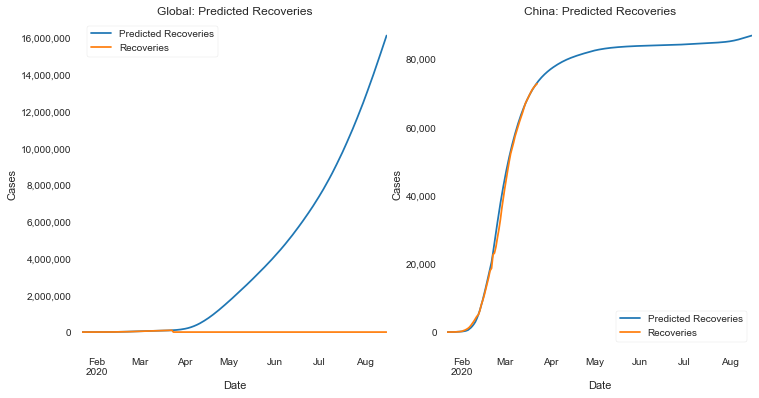

In [39]:
#create subplot figure with having two side by side plots
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(12,6))
axes[0].yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
axes[1].yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
axes[0].set_xlabel('Date')
axes[1].set_xlabel('Date')
axes[0].set_ylabel('Cases')
axes[1].set_ylabel('Cases')
axes[0].set_title('Global: Predicted Recoveries')
axes[1].set_title("China: Predicted Recoveries")
resultG.plot(ax = axes[0]) 
resultC.plot(ax = axes[1])
plt.savefig("Global_predicted_recoveries_VS_China")
plt.show()

profile = ProfileReport(resultG, title="Pandas Profiling Report_Global", explorative=True)
profile.to_file("Global_report.html")
profile = ProfileReport(resultC, title="Pandas Profiling Report_China", explorative=True)
profile.to_file("China_report.html")

print("This formula is only being used to predict the number of recoveries from the time that JHU data is not available. We can compare the results of this formula to the existing data from JHU to show the level of fit. This can be seen in the 4 graphs.")

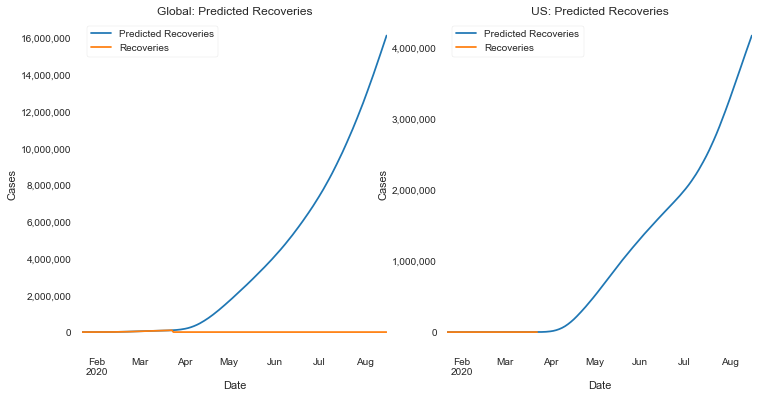

In [40]:
#create subplot figure with having two side by side plots
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(12,6))
axes[0].yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
axes[1].yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
axes[0].set_xlabel('Date')
axes[1].set_xlabel('Date')
axes[0].set_ylabel('Cases')
axes[1].set_ylabel('Cases')
axes[0].set_title('Global: Predicted Recoveries')
axes[1].set_title("US: Predicted Recoveries")
resultG.plot(ax = axes[0]) 
resultD.plot(ax = axes[1])
plt.savefig("Global_predicted_recoveries_VS_USA")
plt.show()


profile = ProfileReport(resultD, title="Pandas Profiling Report_US", explorative=True)
profile.to_file("US_report.html")